# Analysing the Heart Disease dataset

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [115]:
df = pd.read_csv('Heart_Disease_and_Hospitals.csv')
df.head()

,full_name,age,country,state,blood_pressure,cholesterol,bmi,glucose_level,gender,first_name,last_name,hospital,treatment,treatment_date,heart_disease
0,Alice Johnson,21,USA,Utah,138.068129,270.564349,36.101427,63.487954,Female,Alice,Johnson,Starlight Hospital,Physiotherapy,2021-07-07 21:23:23.542872956,1
1,Bob Williams,44,USA,North Dakota,100.383639,160.910030,14.330471,187.008977,Female,Bob,Williams,Maple Leaf Hospital,Counseling,2023-09-13 07:31:37.167014532,0
2,Oliver Jones,22,USA,Iowa,145.618318,208.490251,20.277098,35.903576,Female,Oliver,Jones,Crossroads Health Center,Medication,2019-11-22 03:56:29.389793943,0
3,Quinn Davis,19,USA,Louisiana,152.577870,348.153738,62.712693,31.495166,Female,Quinn,Davis,Springfield General Hospital,Counseling,2021-10-09 23:10:16.253672680,1
4,Alice Martinez,64,USA,Massachusetts,111.793570,200.628925,14.468485,154.513129,Female,Alice,Martinez,Valley View Hospital,Rehabilitation,2018-03-16 04:43:59.950843739,1


In [116]:
# EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   full_name       10000 non-null  object 
 1   age             10000 non-null  int64  
 2   country         10000 non-null  object 
 3   state           10000 non-null  object 
 4   blood_pressure  10000 non-null  float64
 5   cholesterol     10000 non-null  float64
 6   bmi             10000 non-null  float64
 7   glucose_level   10000 non-null  float64
 8   gender          10000 non-null  object 
 9   first_name      10000 non-null  object 
 10  last_name       10000 non-null  object 
 11  hospital        10000 non-null  object 
 12  treatment       10000 non-null  object 
 13  treatment_date  10000 non-null  object 
 14  heart_disease   10000 non-null  int64  
dtypes: float64(4), int64(2), object(9)
memory usage: 1.1+ MB


In [117]:
df.columns

Index(['full_name', 'age', 'country', 'state', 'blood_pressure', 'cholesterol',
       'bmi', 'glucose_level', 'gender', 'first_name', 'last_name', 'hospital',
       'treatment', 'treatment_date', 'heart_disease'],
      dtype='object')

In [118]:
df.shape

(10000, 15)

In [119]:
df.describe()

,age,blood_pressure,cholesterol,bmi,glucose_level,heart_disease
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,48.566700,104.837432,206.309340,21.418244,90.239345,0.500700
std,17.962461,33.437049,95.123826,13.011348,91.885699,0.500025
min,18.000000,10.459711,0.183391,0.011695,-185.805248,0.000000
25%,33.000000,81.304705,131.375908,10.898010,13.776164,0.000000
50%,49.000000,97.742674,213.826294,21.057592,88.909937,1.000000
75%,64.000000,124.318920,279.348476,28.836712,164.695370,1.000000
max,79.000000,244.542017,539.094051,75.308643,377.564242,1.000000


In [120]:
df.isnull().sum()

full_name         0
age               0
country           0
state             0
blood_pressure    0
cholesterol       0
bmi               0
glucose_level     0
gender            0
first_name        0
last_name         0
hospital          0
treatment         0
treatment_date    0
heart_disease     0
dtype: int64

In [121]:
df.isna().sum()

full_name         0
age               0
country           0
state             0
blood_pressure    0
cholesterol       0
bmi               0
glucose_level     0
gender            0
first_name        0
last_name         0
hospital          0
treatment         0
treatment_date    0
heart_disease     0
dtype: int64

In [122]:
# changing the date column to date
df['treatment_date'] = pd.to_datetime(df['treatment_date']).dt.tz_localize(None)
df['full_name'] = df['first_name'] + ' ' + df['last_name']
df.head()

,full_name,age,country,state,blood_pressure,cholesterol,bmi,glucose_level,gender,first_name,last_name,hospital,treatment,treatment_date,heart_disease
0,Alice Johnson,21,USA,Utah,138.068129,270.564349,36.101427,63.487954,Female,Alice,Johnson,Starlight Hospital,Physiotherapy,2021-07-07 21:23:23.542872956,1
1,Bob Williams,44,USA,North Dakota,100.383639,160.910030,14.330471,187.008977,Female,Bob,Williams,Maple Leaf Hospital,Counseling,2023-09-13 07:31:37.167014532,0
2,Oliver Jones,22,USA,Iowa,145.618318,208.490251,20.277098,35.903576,Female,Oliver,Jones,Crossroads Health Center,Medication,2019-11-22 03:56:29.389793943,0
3,Quinn Davis,19,USA,Louisiana,152.577870,348.153738,62.712693,31.495166,Female,Quinn,Davis,Springfield General Hospital,Counseling,2021-10-09 23:10:16.253672680,1
4,Alice Martinez,64,USA,Massachusetts,111.793570,200.628925,14.468485,154.513129,Female,Alice,Martinez,Valley View Hospital,Rehabilitation,2018-03-16 04:43:59.950843739,1


In [123]:
new_column_order = ['full_name', 'age', 'country', 'state'] + [col for col in df.columns if col not in ['full_name', 'age', 'country', 'state']]

# Reorder the DataFrame columns
df = df[new_column_order]
df.head()

,full_name,age,country,state,blood_pressure,cholesterol,bmi,glucose_level,gender,first_name,last_name,hospital,treatment,treatment_date,heart_disease
0,Alice Johnson,21,USA,Utah,138.068129,270.564349,36.101427,63.487954,Female,Alice,Johnson,Starlight Hospital,Physiotherapy,2021-07-07 21:23:23.542872956,1
1,Bob Williams,44,USA,North Dakota,100.383639,160.910030,14.330471,187.008977,Female,Bob,Williams,Maple Leaf Hospital,Counseling,2023-09-13 07:31:37.167014532,0
2,Oliver Jones,22,USA,Iowa,145.618318,208.490251,20.277098,35.903576,Female,Oliver,Jones,Crossroads Health Center,Medication,2019-11-22 03:56:29.389793943,0
3,Quinn Davis,19,USA,Louisiana,152.577870,348.153738,62.712693,31.495166,Female,Quinn,Davis,Springfield General Hospital,Counseling,2021-10-09 23:10:16.253672680,1
4,Alice Martinez,64,USA,Massachusetts,111.793570,200.628925,14.468485,154.513129,Female,Alice,Martinez,Valley View Hospital,Rehabilitation,2018-03-16 04:43:59.950843739,1


In [124]:
col_without_heart_disease = [col for col in df.columns if col != 'heart_disease']
new_order_column = col_without_heart_disease + ['heart_disease']

df = df[new_order_column]

df.head()

,full_name,age,country,state,blood_pressure,cholesterol,bmi,glucose_level,gender,first_name,last_name,hospital,treatment,treatment_date,heart_disease
0,Alice Johnson,21,USA,Utah,138.068129,270.564349,36.101427,63.487954,Female,Alice,Johnson,Starlight Hospital,Physiotherapy,2021-07-07 21:23:23.542872956,1
1,Bob Williams,44,USA,North Dakota,100.383639,160.910030,14.330471,187.008977,Female,Bob,Williams,Maple Leaf Hospital,Counseling,2023-09-13 07:31:37.167014532,0
2,Oliver Jones,22,USA,Iowa,145.618318,208.490251,20.277098,35.903576,Female,Oliver,Jones,Crossroads Health Center,Medication,2019-11-22 03:56:29.389793943,0
3,Quinn Davis,19,USA,Louisiana,152.577870,348.153738,62.712693,31.495166,Female,Quinn,Davis,Springfield General Hospital,Counseling,2021-10-09 23:10:16.253672680,1
4,Alice Martinez,64,USA,Massachusetts,111.793570,200.628925,14.468485,154.513129,Female,Alice,Martinez,Valley View Hospital,Rehabilitation,2018-03-16 04:43:59.950843739,1


In [125]:
# Replace negative cholesterol values with random positive values within a realistic range (e.g., 200-250)
df.loc[df['cholesterol'] < 0, 'cholesterol'] = np.random.uniform(200, 250, size=(df['cholesterol'] < 0).sum())

# Replace negative BMI values with random positive values within a realistic range (e.g., 18.5-30)
df.loc[df['bmi'] < 0, 'bmi'] = np.random.uniform(18.5, 30, size=(df['bmi'] < 0).sum())

In [126]:
df.to_csv('Heart_Disease_and_Hospitals.csv', index=False)

In [127]:
# checking for outlies using boxplots in numeric columns
def ouliers_detect_iqr(col):
      # Storing the outliers in Dictionary
      outliers = {}
      # looping through numerrical columns
      for col in df.select_dtypes(include=['int64', 'float64']).columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)

            IQR = Q3 - Q1

      # defining bounds for outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

      # Identify outliers
            outliers_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index

      # store the outlier in the outliers
            if len(outliers_indices) > 0: 
                  outliers[col] = df.loc[outliers_indices, col]

      return outliers

# Applying the function to the Data frame
ouliers_iqr = ouliers_detect_iqr(df)

# printing the ouliers for each colums
for col, outliers in ouliers_iqr.items():
      print(f"Ouliers in the columsn {col} : \n{outliers}\n")

Ouliers in the columsn blood_pressure : 
138     189.559062
191     192.369659
226     189.567970
361     204.295010
437     205.215614
           ...    
9707    193.859842
9791    195.411703
9801    212.164081
9802    204.644496
9998    203.765312
Name: blood_pressure, Length: 136, dtype: float64

Ouliers in the columsn cholesterol : 
975    539.094051
Name: cholesterol, dtype: float64

Ouliers in the columsn bmi : 
3       62.712693
29      62.368692
131     66.695257
242     59.416695
444     59.662420
          ...    
9301    61.841376
9546    57.928177
9560    60.521787
9799    59.454149
9805    61.167873
Name: bmi, Length: 67, dtype: float64



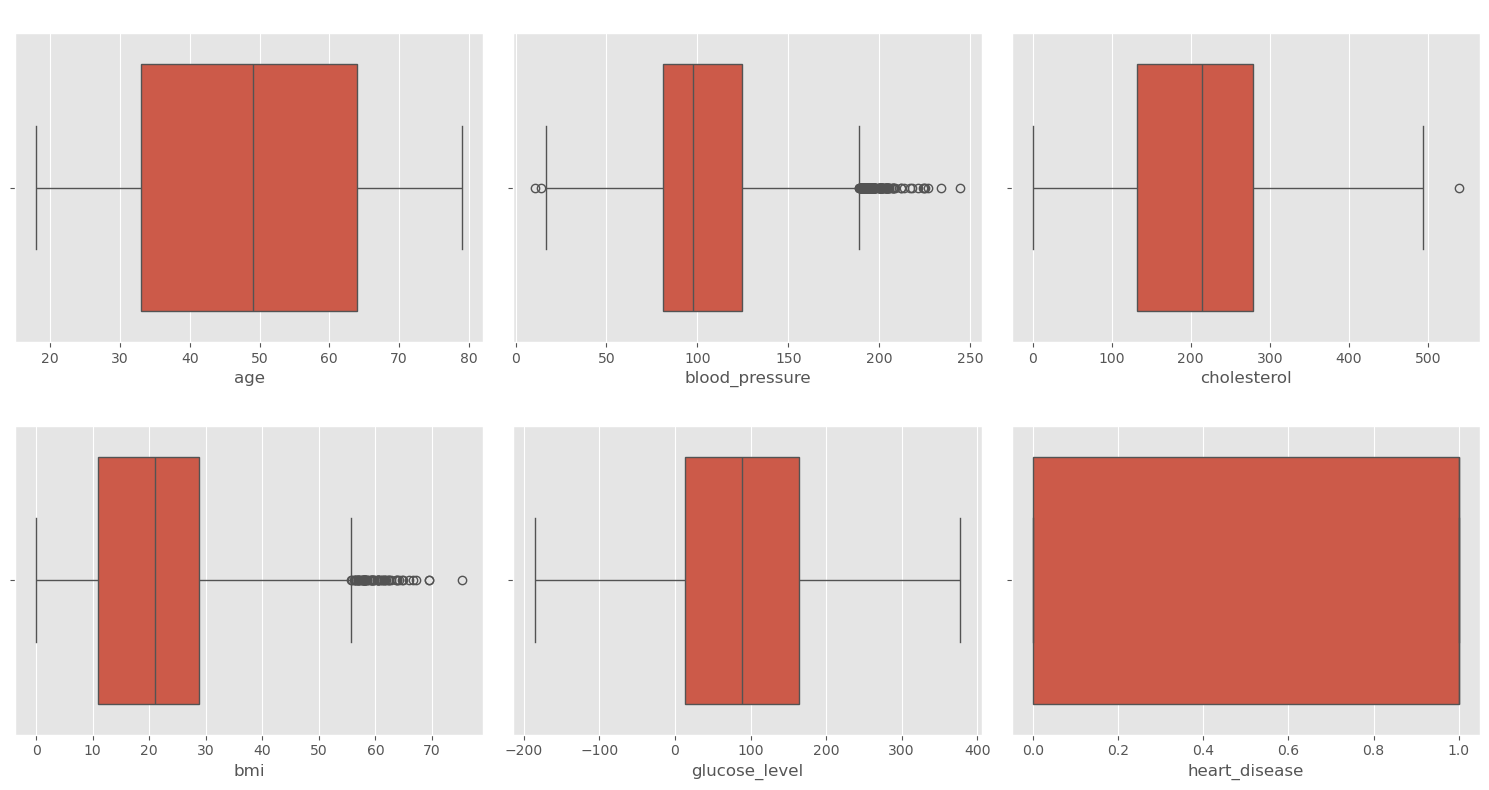

In [128]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Set the number of rows and columns for the subplots
n_cols = 3  # Number of columns for subplots
n_rows = (len(numeric_cols) // n_cols) + (len(numeric_cols) % n_cols > 0)  # Calculate rows needed

# Create a figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each numeric column and create a boxplot
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    
# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [129]:
# Removing ouliers by imputing the median
cholesterol_median = df['cholesterol'].median()
bmi_median = df['bmi'].median()
blood_pressure_median = df['blood_pressure'].median()

df['cholesterol'] = np.where(df['cholesterol'] > 300, cholesterol_median, df['cholesterol'])
df['bmi'] = np.where(df['bmi'] > 50, bmi_median, df['bmi'])
df['blood_pressure'] = np.where((df['blood_pressure'] > 180) | (df['blood_pressure'] < 90), blood_pressure_median, df['blood_pressure'])


In [130]:
outliers_iqr = ouliers_detect_iqr(df)
for col, outliers in outliers_iqr.items():
      print(f"Outliers of the {col}: \n{outliers}\n")

Outliers of the blood_pressure: 
18      163.080878
32      160.456645
67      158.205879
69      168.307358
76      178.846830
           ...    
9952    156.385740
9958    159.459833
9970    173.881028
9973    156.246921
9975    166.609355
Name: blood_pressure, Length: 853, dtype: float64



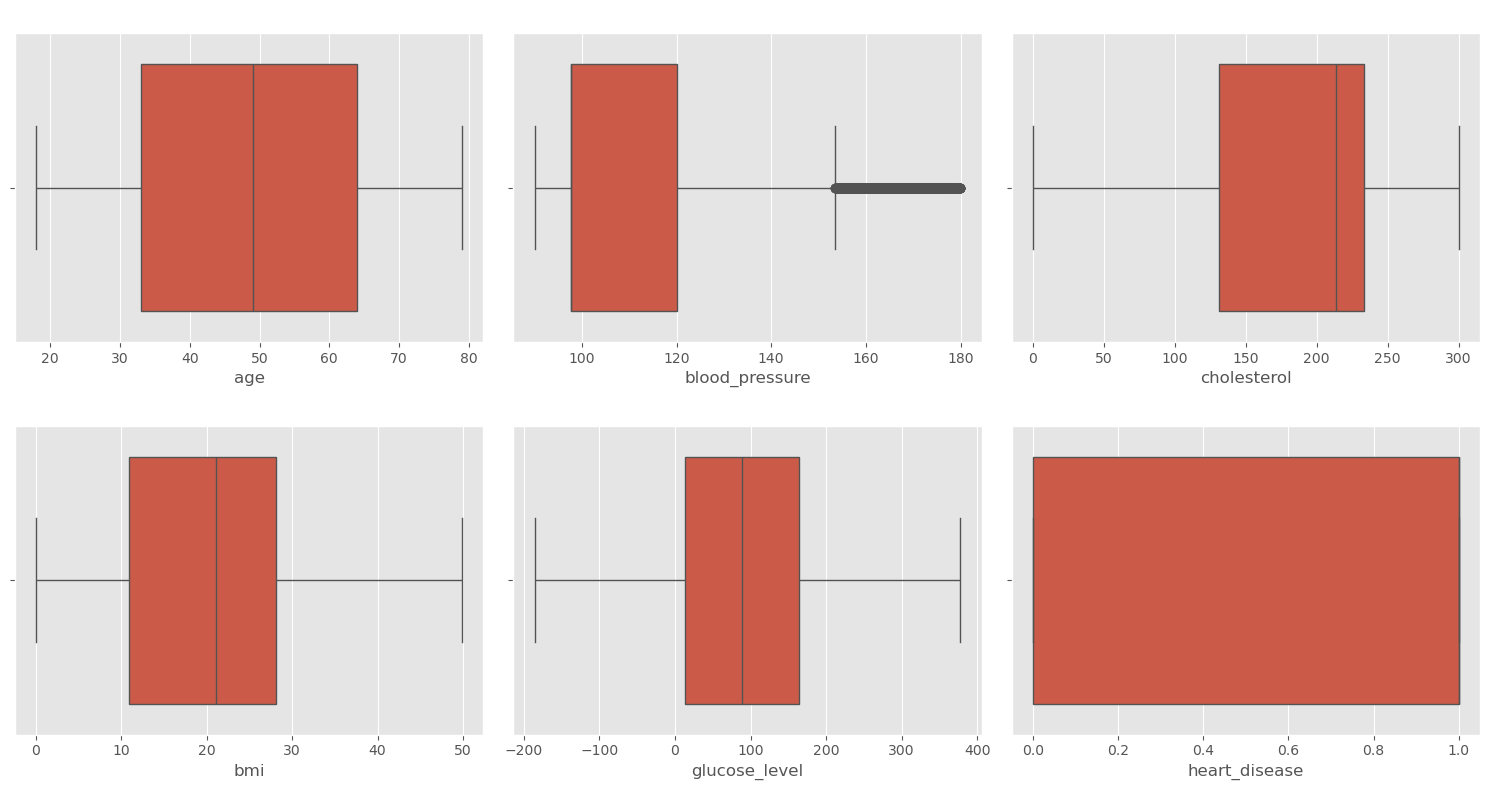

In [131]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Set the number of rows and columns for the subplots
n_cols = 3  # Number of columns for subplots
n_rows = (len(numeric_cols) // n_cols) + (len(numeric_cols) % n_cols > 0)  # Calculate rows needed

# Create a figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each numeric column and create a boxplot
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    
# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [132]:
outliers = ouliers_detect_iqr(df['blood_pressure'])
print(f"{col}: {outliers}")

heart_disease: {'blood_pressure': 18      163.080878
32      160.456645
67      158.205879
69      168.307358
76      178.846830
           ...    
9952    156.385740
9958    159.459833
9970    173.881028
9973    156.246921
9975    166.609355
Name: blood_pressure, Length: 853, dtype: float64}


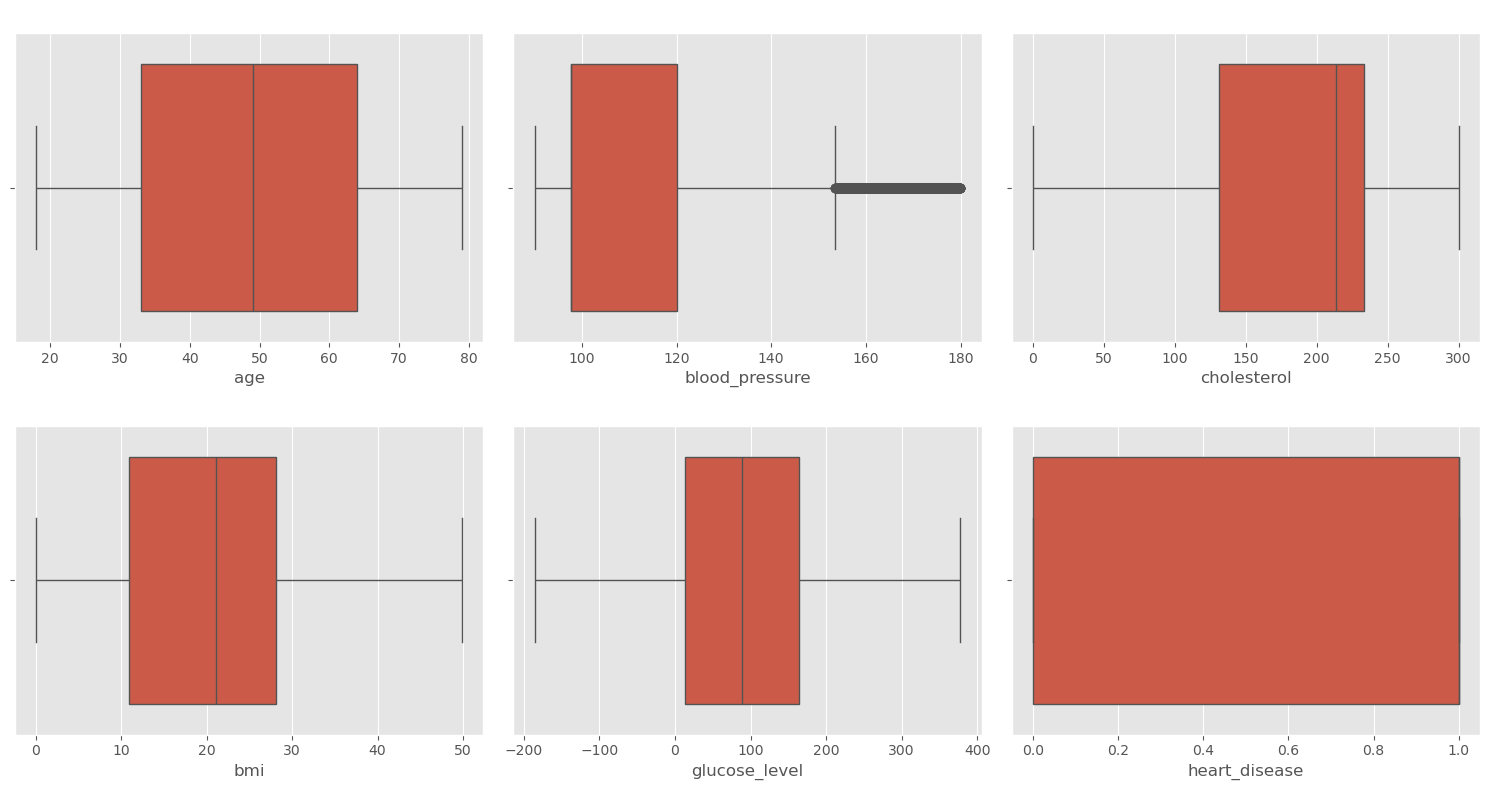

In [133]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Set the number of rows and columns for the subplots
n_cols = 3  # Number of columns for subplots
n_rows = (len(numeric_cols) // n_cols) + (len(numeric_cols) % n_cols > 0)  # Calculate rows needed

# Create a figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each numeric column and create a boxplot
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    
# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Class counts:
heart_disease
1    5007
0    4993
Name: count, dtype: int64


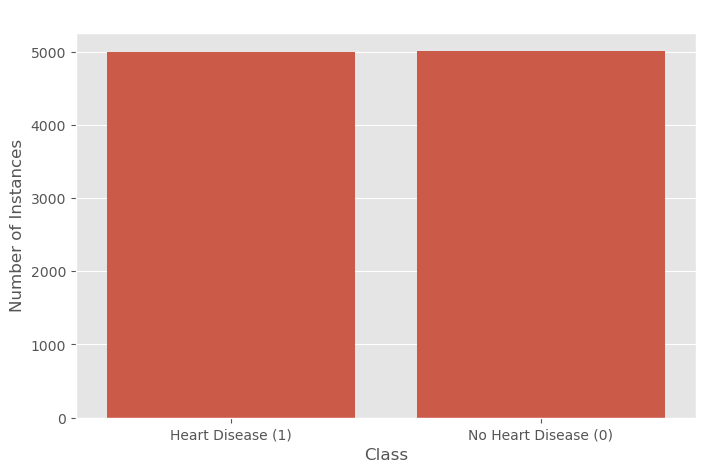

In [134]:
# Checking for class imbalance
# Step 1: Identify the target variable
target_variable = 'heart_disease'

# Step 2: Count occurrences of each class
class_counts = df[target_variable].value_counts()

# Print the counts of each class
print("Class counts:")
print(class_counts)

# Step 3: Visualize the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.xticks(ticks=class_counts.index, labels=['No Heart Disease (0)', 'Heart Disease (1)'])
plt.show()

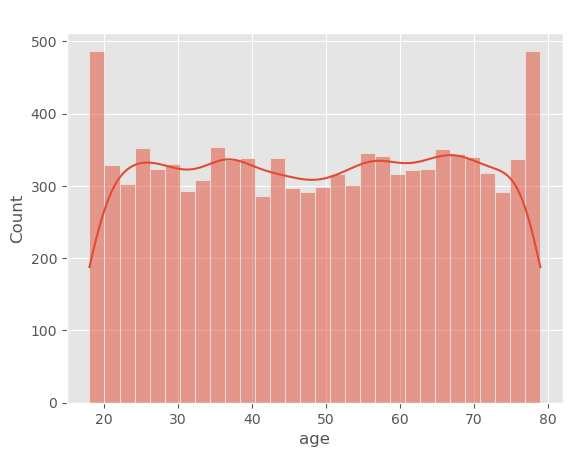

In [135]:
# Visualizing the Dataset comparing with feature and target column
# bloodpressure vs age
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

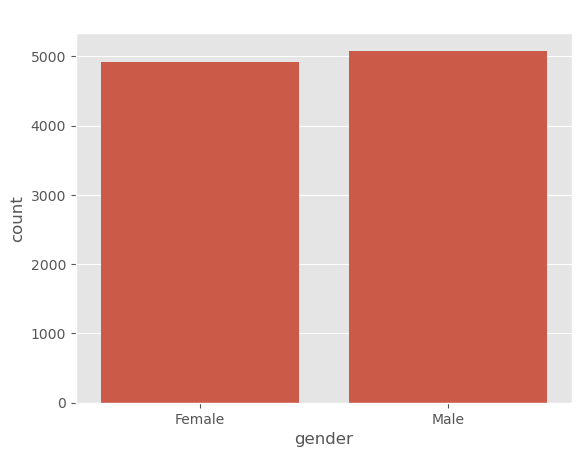

In [136]:
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

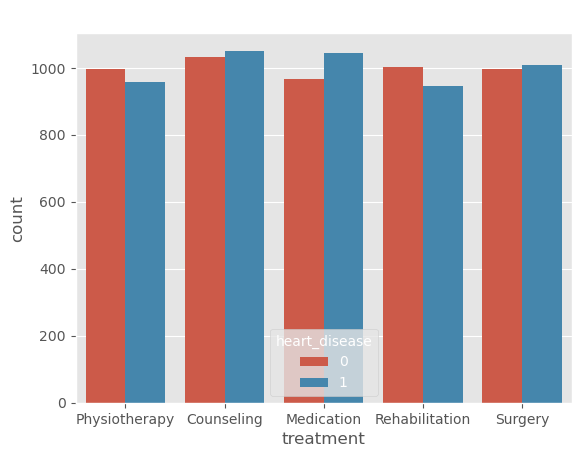

In [137]:
sns.countplot(x='treatment', hue='heart_disease', data=df)
plt.title('Heart Disease by Treatment Type')
plt.show()

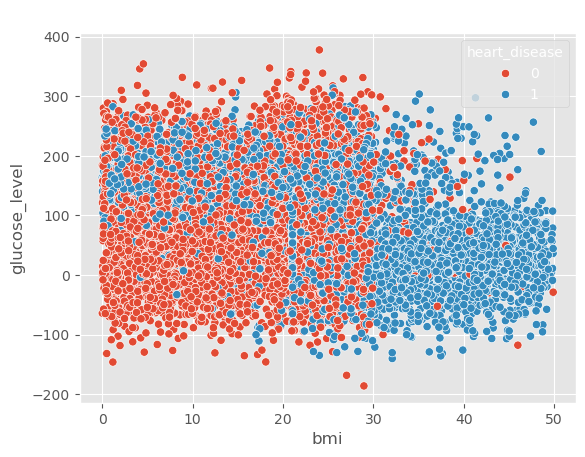

In [138]:
sns.scatterplot(x='bmi', y='glucose_level', hue='heart_disease', data=df)
plt.title('BMI vs Glucose Level')
plt.show()

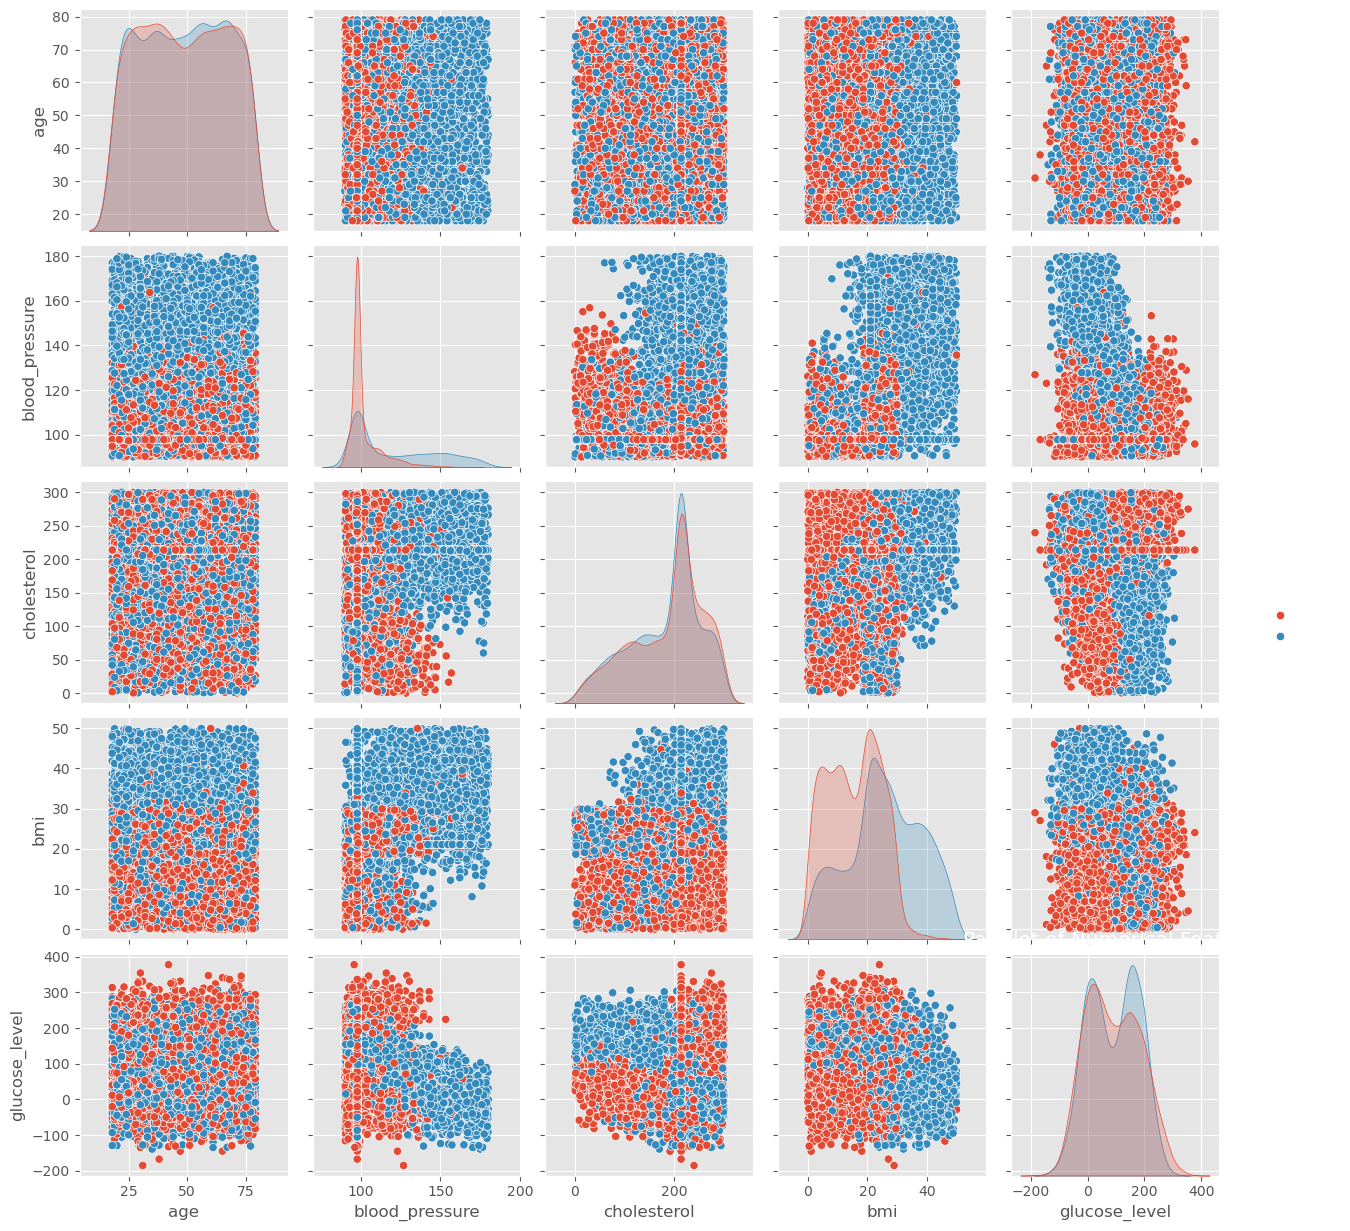

In [139]:
sns.pairplot(df, hue='heart_disease')
plt.title('Pairplot of Numerical Features')
plt.show()

/var/folders/_6/pkkb2pfn30l079zw13jmkcd80000gn/T/ipykernel_7353/4187654990.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M').count()['heart_disease'].plot()


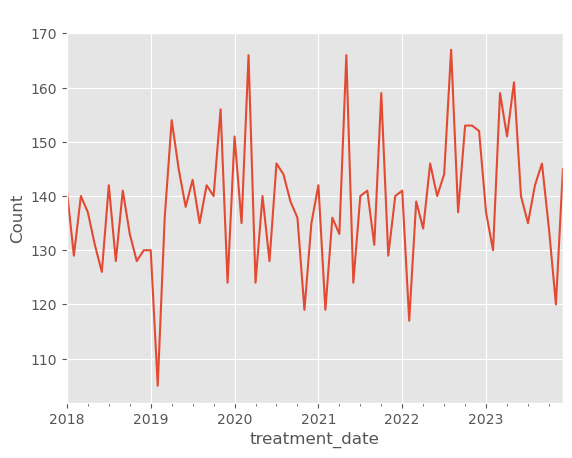

In [140]:
df['treatment_date'] = pd.to_datetime(df['treatment_date'])
df.set_index('treatment_date', inplace=True)
df.resample('M').count()['heart_disease'].plot()
plt.title('Monthly Heart Disease Count Over Time')
plt.ylabel('Count')
plt.show()

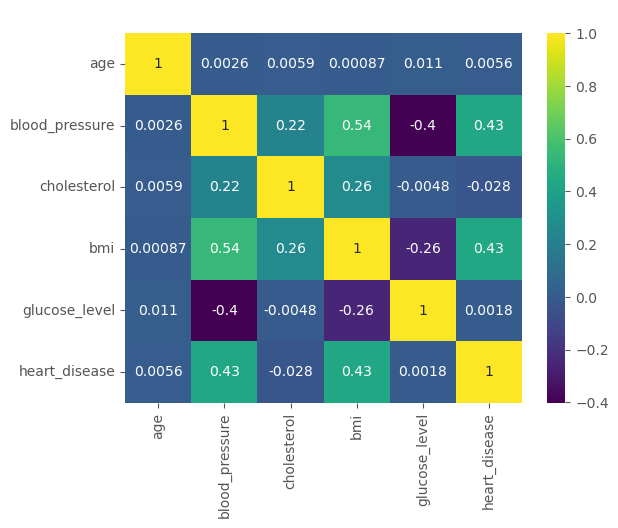

In [141]:
correlation_matrix = df[['age', 'blood_pressure', 'cholesterol', 'bmi', 'glucose_level', 'heart_disease']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

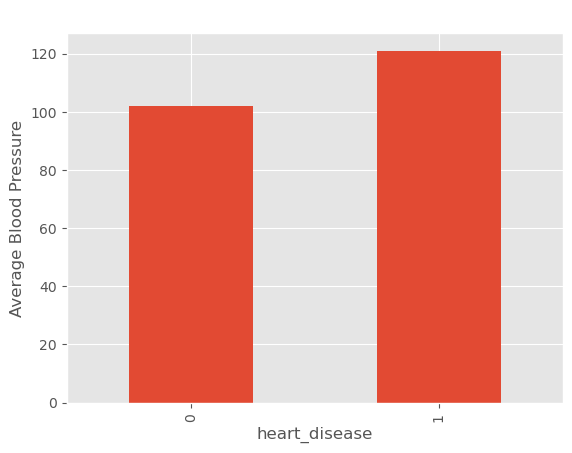

In [142]:
df.groupby('heart_disease')['blood_pressure'].mean().plot(kind='bar')
plt.title('Average Blood Pressure by Heart Disease Status')
plt.ylabel('Average Blood Pressure')
plt.show()

/var/folders/_6/pkkb2pfn30l079zw13jmkcd80000gn/T/ipykernel_7353/1290764207.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='hospital', data = top_hospitals, palette='viridis')


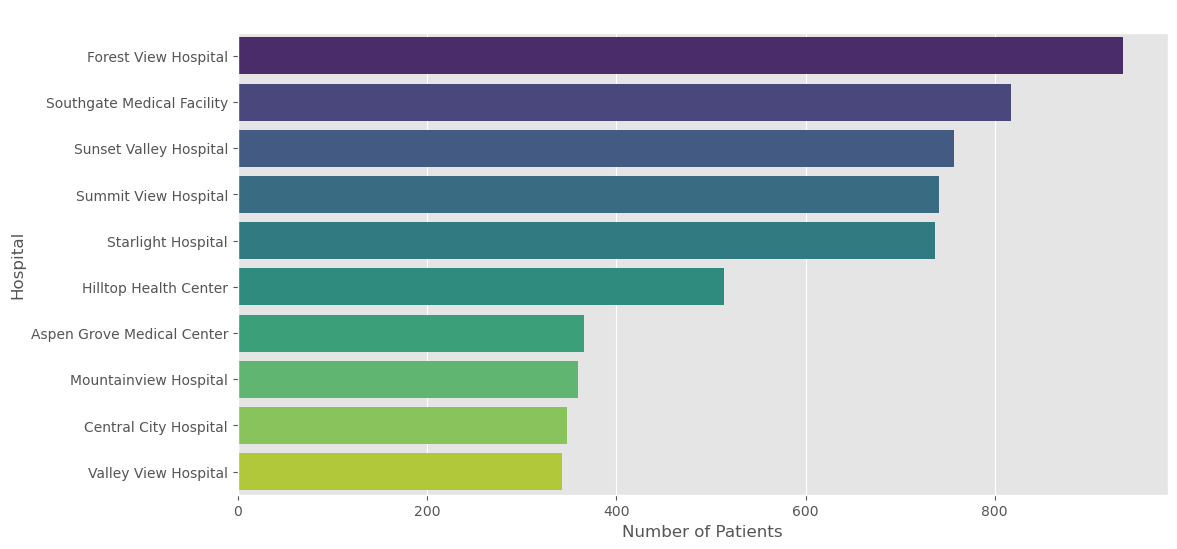

In [143]:
hospital_counts = df['hospital'].value_counts()
hospital_counts_df = hospital_counts.reset_index()
hospital_counts_df.columns = ['hospital', 'count']

top_hospitals = hospital_counts_df.sort_values(by='count', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='count', y='hospital', data = top_hospitals, palette='viridis')
plt.title('Top 10 hospital for patient')
plt.xlabel('Number of Patients')
plt.ylabel('Hospital')
plt.show()

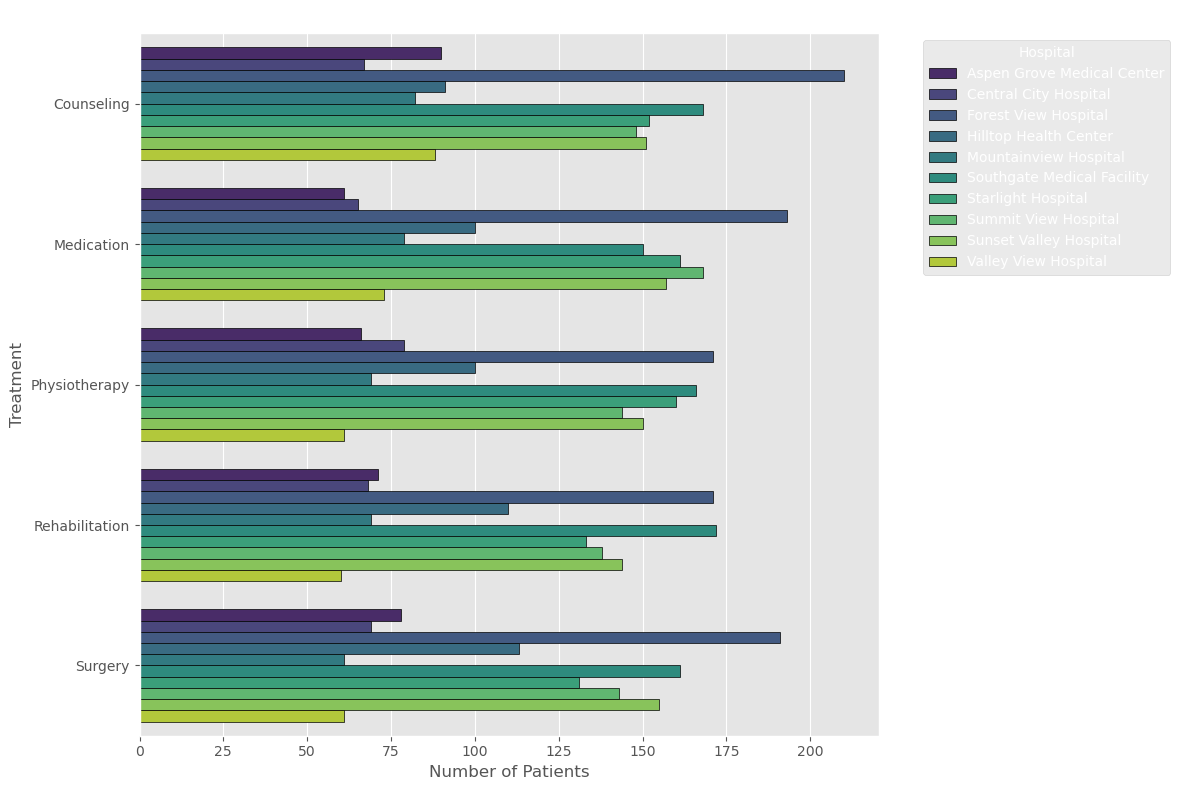

In [144]:
treatment_counts = df.groupby(['hospital', 'treatment']).size().reset_index(name='count')

# Find the top hospitals based on patient count
top_hospitals = treatment_counts.groupby('hospital')['count'].sum().nlargest(10).index

# Filter treatment counts to include only top hospitals
top_treatment_counts = treatment_counts[treatment_counts['hospital'].isin(top_hospitals)]

# Find the top treatments based on count in the filtered DataFrame
top_treatments = top_treatment_counts.groupby('treatment')['count'].sum().nlargest(10).index

# Filter to include only top treatments
top_treatment_counts = top_treatment_counts[top_treatment_counts['treatment'].isin(top_treatments)]

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='treatment', hue='hospital', data=top_treatment_counts, palette='viridis', edgecolor='black')
plt.title('Top Treatments vs Top Hospitals')
plt.xlabel('Number of Patients')
plt.ylabel('Treatment')
plt.legend(title='Hospital', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [145]:
# Modelling the Dataset
# Feature engineering
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10000 entries, 2021-07-07 21:23:23.542872956 to 2019-10-14 16:11:35.683316170
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   full_name       10000 non-null  object 
 1   age             10000 non-null  int64  
 2   country         10000 non-null  object 
 3   state           10000 non-null  object 
 4   blood_pressure  10000 non-null  float64
 5   cholesterol     10000 non-null  float64
 6   bmi             10000 non-null  float64
 7   glucose_level   10000 non-null  float64
 8   gender          10000 non-null  object 
 9   first_name      10000 non-null  object 
 10  last_name       10000 non-null  object 
 11  hospital        10000 non-null  object 
 12  treatment       10000 non-null  object 
 13  heart_disease   10000 non-null  int64  
dtypes: float64(4), int64(2), object(8)
memory usage: 1.1+ MB


In [146]:
# Reset the index to convert the treatment_date back to a column
df.reset_index(inplace=True)

# Rename the index column if necessary (the default name will be 'index')
df.rename(columns={'index': 'treatment_date'}, inplace=True)

# Display the DataFrame to check the changes
print(df.head())

                 treatment_date       full_name  age country          state  \
0 2021-07-07 21:23:23.542872956   Alice Johnson   21     USA           Utah   
1 2023-09-13 07:31:37.167014532    Bob Williams   44     USA   North Dakota   
2 2019-11-22 03:56:29.389793943    Oliver Jones   22     USA           Iowa   
3 2021-10-09 23:10:16.253672680     Quinn Davis   19     USA      Louisiana   
4 2018-03-16 04:43:59.950843739  Alice Martinez   64     USA  Massachusetts   

   blood_pressure  cholesterol        bmi  glucose_level  gender first_name  \
0      138.068129   270.564349  36.101427      63.487954  Female      Alice   
1      100.383639   160.910030  14.330471     187.008977  Female        Bob   
2      145.618318   208.490251  20.277098      35.903576  Female     Oliver   
3      152.577870   213.826294  21.057592      31.495166  Female      Quinn   
4      111.793570   200.628925  14.468485     154.513129  Female      Alice   

  last_name                      hospital       tr

In [147]:
df.head()

,treatment_date,full_name,age,country,state,blood_pressure,cholesterol,bmi,glucose_level,gender,first_name,last_name,hospital,treatment,heart_disease
0,2021-07-07 21:23:23.542872956,Alice Johnson,21,USA,Utah,138.068129,270.564349,36.101427,63.487954,Female,Alice,Johnson,Starlight Hospital,Physiotherapy,1
1,2023-09-13 07:31:37.167014532,Bob Williams,44,USA,North Dakota,100.383639,160.910030,14.330471,187.008977,Female,Bob,Williams,Maple Leaf Hospital,Counseling,0
2,2019-11-22 03:56:29.389793943,Oliver Jones,22,USA,Iowa,145.618318,208.490251,20.277098,35.903576,Female,Oliver,Jones,Crossroads Health Center,Medication,0
3,2021-10-09 23:10:16.253672680,Quinn Davis,19,USA,Louisiana,152.577870,213.826294,21.057592,31.495166,Female,Quinn,Davis,Springfield General Hospital,Counseling,1
4,2018-03-16 04:43:59.950843739,Alice Martinez,64,USA,Massachusetts,111.793570,200.628925,14.468485,154.513129,Female,Alice,Martinez,Valley View Hospital,Rehabilitation,1


In [148]:
# Feature engineering for Date column for year, month, and day of week
df['month'] = df['treatment_date'].dt.month
df['year'] = df['treatment_date'].dt.year
df['day_of_week'] = df['treatment_date'].dt.dayofweek

In [149]:
# Gender colums
df_gender_dummies = pd.get_dummies(df['gender'], prefix='gender')
df = pd.concat([df, df_gender_dummies], axis=1)
df.drop('gender', axis=1, inplace=True)
df.head()

,treatment_date,full_name,age,country,state,blood_pressure,cholesterol,bmi,glucose_level,first_name,last_name,hospital,treatment,heart_disease,month,year,day_of_week,gender_Female,gender_Male
0,2021-07-07 21:23:23.542872956,Alice Johnson,21,USA,Utah,138.068129,270.564349,36.101427,63.487954,Alice,Johnson,Starlight Hospital,Physiotherapy,1,7,2021,2,True,False
1,2023-09-13 07:31:37.167014532,Bob Williams,44,USA,North Dakota,100.383639,160.910030,14.330471,187.008977,Bob,Williams,Maple Leaf Hospital,Counseling,0,9,2023,2,True,False
2,2019-11-22 03:56:29.389793943,Oliver Jones,22,USA,Iowa,145.618318,208.490251,20.277098,35.903576,Oliver,Jones,Crossroads Health Center,Medication,0,11,2019,4,True,False
3,2021-10-09 23:10:16.253672680,Quinn Davis,19,USA,Louisiana,152.577870,213.826294,21.057592,31.495166,Quinn,Davis,Springfield General Hospital,Counseling,1,10,2021,5,True,False
4,2018-03-16 04:43:59.950843739,Alice Martinez,64,USA,Massachusetts,111.793570,200.628925,14.468485,154.513129,Alice,Martinez,Valley View Hospital,Rehabilitation,1,3,2018,4,True,False


In [150]:
# Feature Engineering for Treatment column
df_treatment_dummies = pd.get_dummies(df['treatment'], prefix='treatment')
df = pd.concat([df, df_treatment_dummies], axis=1)
df.drop('treatment', axis=1, inplace=True)
df.head()

,treatment_date,full_name,age,country,state,blood_pressure,cholesterol,bmi,glucose_level,first_name,...,month,year,day_of_week,gender_Female,gender_Male,treatment_Counseling,treatment_Medication,treatment_Physiotherapy,treatment_Rehabilitation,treatment_Surgery
0,2021-07-07 21:23:23.542872956,Alice Johnson,21,USA,Utah,138.068129,270.564349,36.101427,63.487954,Alice,...,7,2021,2,True,False,False,False,True,False,False
1,2023-09-13 07:31:37.167014532,Bob Williams,44,USA,North Dakota,100.383639,160.910030,14.330471,187.008977,Bob,...,9,2023,2,True,False,True,False,False,False,False
2,2019-11-22 03:56:29.389793943,Oliver Jones,22,USA,Iowa,145.618318,208.490251,20.277098,35.903576,Oliver,...,11,2019,4,True,False,False,True,False,False,False
3,2021-10-09 23:10:16.253672680,Quinn Davis,19,USA,Louisiana,152.577870,213.826294,21.057592,31.495166,Quinn,...,10,2021,5,True,False,True,False,False,False,False
4,2018-03-16 04:43:59.950843739,Alice Martinez,64,USA,Massachusetts,111.793570,200.628925,14.468485,154.513129,Alice,...,3,2018,4,True,False,False,False,False,True,False


In [151]:
df.columns

Index(['treatment_date', 'full_name', 'age', 'country', 'state',
       'blood_pressure', 'cholesterol', 'bmi', 'glucose_level', 'first_name',
       'last_name', 'hospital', 'heart_disease', 'month', 'year',
       'day_of_week', 'gender_Female', 'gender_Male', 'treatment_Counseling',
       'treatment_Medication', 'treatment_Physiotherapy',
       'treatment_Rehabilitation', 'treatment_Surgery'],
      dtype='object')

In [152]:
# Taking all the numerical columns
new_df = df[['treatment_date', 
      #  'full_name', 
      'age', 
      # 'country', 'state',
       'blood_pressure', 'cholesterol', 'bmi', 'glucose_level', 
      #  'first_name',
      #  'last_name', 'hospital', 
      'heart_disease', 'month', 'year',
       'day_of_week', 'gender_Female', 'gender_Male', 'treatment_Counseling',
       'treatment_Medication', 'treatment_Physiotherapy',
       'treatment_Rehabilitation', 'treatment_Surgery']].copy()

In [153]:
new_df.drop('treatment_date', axis=1, inplace=True)

In [154]:
new_df.head()

,age,blood_pressure,cholesterol,bmi,glucose_level,heart_disease,month,year,day_of_week,gender_Female,gender_Male,treatment_Counseling,treatment_Medication,treatment_Physiotherapy,treatment_Rehabilitation,treatment_Surgery
0,21,138.068129,270.564349,36.101427,63.487954,1,7,2021,2,True,False,False,False,True,False,False
1,44,100.383639,160.910030,14.330471,187.008977,0,9,2023,2,True,False,True,False,False,False,False
2,22,145.618318,208.490251,20.277098,35.903576,0,11,2019,4,True,False,False,True,False,False,False
3,19,152.577870,213.826294,21.057592,31.495166,1,10,2021,5,True,False,True,False,False,False,False
4,64,111.793570,200.628925,14.468485,154.513129,1,3,2018,4,True,False,False,False,False,True,False


In [155]:
# Splitting the model in X and y
X = new_df.drop('heart_disease', axis=1)
y = new_df['heart_disease']

In [156]:
# Initializing the skf object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [157]:
# Creating a pipeline
pipeline = Pipeline([
      ('sc', StandardScaler()),
      ('rn', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [158]:
# Perform K fold Cross validation
accuracy_scores = []
f1_scores = []
fold = 1

for train_index, test_index in skf.split(X, y):
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]

      # fitting to the pipeline
      pipeline.fit(X_train, y_train)

      # Predicting the model
      y_pred = pipeline.predict(X_test)

      # Calculating the accuracy score and f1 score
      acc = accuracy_score(y_test, y_pred)
      fscore = f1_score(y_test, y_pred)

      # Appending
      accuracy_scores.append(acc)
      f1_scores.append(fscore)

      # Printing all the folds
      print(f"Fold {fold}, Classification Report:")
      print(classification_report(y_test, y_pred))
      fold += 1

Fold 1, Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       998
           1       0.91      0.89      0.90      1002

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000

Fold 2, Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       998
           1       0.92      0.91      0.91      1002

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000

Fold 3, Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       999
           1       0.91      0.87      0.89      1001

    accuracy                           0.89      2000
   macro avg       0.89      0.89  

In [159]:
# Calculating Average accuracy and f1 score
avg_accuracy = np.mean(accuracy_scores)
avg_fscore = np.mean(f1_scores)
print(f"\n Average accuracy of all folds: {avg_accuracy: .3f}")
print(f"\n Average F1_score of all folds: {avg_fscore: .3f}")


 Average accuracy of all folds:  0.904

 Average F1_score of all folds:  0.903


/var/folders/_6/pkkb2pfn30l079zw13jmkcd80000gn/T/ipykernel_7353/3132051653.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='feature_importances', y='feature_names', data=important_df, palette='viridis')


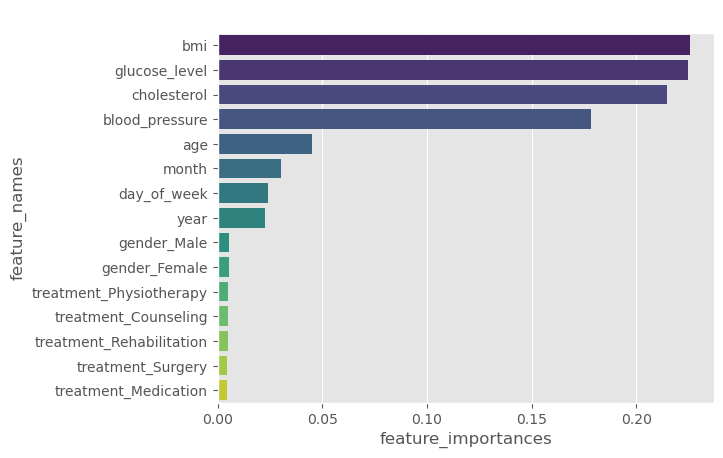

In [160]:
# Fit the original Data frame to the pipeline
pipeline.fit(X, y)

# Feature extraction
feature_importances = pipeline.named_steps['rn'].feature_importances_

# Get the feature name
feature_name = X.columns

# Making the data frame
important_df = pd.DataFrame({'feature_names': feature_name, 'feature_importances': feature_importances})

# Sorting the values for visualization
important_df = important_df.sort_values(by='feature_importances', ascending=False)

# Plotting
sns.barplot(x='feature_importances', y='feature_names', data=important_df, palette='viridis')
plt.title('Feature Importance')
plt.show()

In [161]:
important_df.head()

,feature_names,feature_importances
3,bmi,0.225657
4,glucose_level,0.224907
2,cholesterol,0.214913
1,blood_pressure,0.178247
0,age,0.045266


# Thank You